In [51]:
# -*- coding: utf-8 -*-

import pandas as pd
from pandas_profiling import ProfileReport
import json
import numpy as np
import seaborn as sns
import pdfkit
sns.set(font="cmr10")
from seaborn import heatmap
from pprint import pprint as p
import os
import sys
import subprocess
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'cmr10'})
import sys

NUM_TWEETS = 10000

# TODO: refactor data loading and cleaning to a separate file, e.g. load_data.py
# Load data
fn = 'tweets_01-08-2021.json'
with open(fn, encoding='utf-8') as f:
    df = pd.read_json(f)

# Drop before Trump ran for President.
is_president_or_running_for_president = df['date'] < '2015-06-16'
df = df.loc[np.invert(is_president_or_running_for_president)]

# Sort by RT and take top NUM_TWEETS tweets
df.sort_values(by=['retweets'], ascending=False, inplace=True, ignore_index=True)
df.drop(index=range(NUM_TWEETS, len(df)), inplace=True)

df["id"] = df["id"].astype(str)

p(df.info())
p(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         10000 non-null  object        
 1   text       10000 non-null  object        
 2   isRetweet  10000 non-null  object        
 3   isDeleted  10000 non-null  object        
 4   device     10000 non-null  object        
 5   favorites  10000 non-null  int64         
 6   retweets   10000 non-null  int64         
 7   date       10000 non-null  datetime64[ns]
 8   isFlagged  10000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 781.2+ KB
None
                    id                                               text  \
0  1311892190680014800  Tonight, @FLOTUS and I tested positive for COV...   
1   881503147168071700         #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg   
2   795954831718498300                 TODAY WE MAKE AMERICA GREAT AG

In [52]:
# Initialize new columns to false
with open("feature_whitelist.json") as f:
    features = list(json.load(f))

# Initialize new columns to false
df[features] = 'f'

feature_list = ['maga', 'make america great again']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature)
    is_magazine = df['text'].str.lower().str.contains('magazine')
    df.loc[is_maga, 'isMAGA'] = 't'
    df.loc[is_magazine, 'isMAGA'] = 'f'
print('isMAGA: ' + str(df['isMAGA'].str.contains('t').sum()))

# Populate witch hunt column
feature_list = ['witch hunt']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature)
    df.loc[is_maga, "isWitchHunt"] = 't'
print('isWitchHunt: ' + str(df['isWitchHunt'].str.contains('t').sum()))

# Populate in two weeks column
feature_list = ['two weeks', 'next week']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature)
    df.loc[is_maga, 'isInTwoWeeks'] = 't'
print('isInTwoWeeks: ' + str(df['isInTwoWeeks'].str.contains('t').sum()))

# Populate is so true column
feature_list = ['true.', 'so true']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature)
    df.loc[is_maga, 'isSoTrue'] = 't'
print('isSoTrue: ' + str(df['isSoTrue'].str.contains('t').sum()))

# Populate all caps column
for feature in feature_list:
    is_maga = df['text'].str.isupper()
    df.loc[is_maga, 'isAllCaps'] = 't'
print('isAllCaps: ' + str(df['isAllCaps'].str.contains('t').sum()))

# Populate is Russia column
feature_list = ['russia', 'russian', 'putin']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature)
    df.loc[is_maga, 'isRussia'] = 't'
print('isRussia: ' + str(df['isRussia'].str.contains('t').sum()))

# Populate is Ukraine column
feature_list = ['ukraine', 'ukrainian']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isUkraine'] = 't'
print('isUkraine: ' + str(df['isUkraine'].str.contains('t').sum()))

# Populate is china column
feature_list = ['china', 'chinese']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isChina'] = 't'
print('isChina: ' + str(df['isChina'].str.contains('t').sum()))

# Populate is iran column
feature_list = ['iran', 'iranian']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isIran'] = 't'
print('isIran: ' + str(df['isIran'].str.contains('t').sum()))

# Populate is antifa column
feature_list = ['antifa']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isAntifa'] = 't'
print('isAntifa: ' + str(df['isAntifa'].str.contains('t').sum()))

# Populate is love column
feature_list = ['love', 'heartwarming']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isLove'] = 't'
print('isLove: ' + str(df['isLove'].str.contains('t').sum()))

# Populate is love column
feature_list = ['fake news', 'lamestream media', 'mainstream media']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isLügenpresse'] = 't'
print('isLügenpresse (fake news, lametream media): ' + str(df['isLügenpresse'].str.contains('t').sum()))

# Populate is communism column
feature_list = ['communist', 'communism', 'marxist']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isCommunism'] = 't'
print('isCommunism: ' + str(df['isCommunism'].str.contains('t').sum()))

# Populate is capital raid column
feature_list = ['january 6th', 'jan 6th']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isCapitalRaid'] = 't'
print('isCapitalRaid: ' + str(df['isCapitalRaid'].str.contains('t').sum()))

# Populate is nukes column
feature_list = ['nuclear', 'nuke', 'nukes']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isNukes'] = 't'
print('isNukes: ' + str(df['isNukes'].str.contains('t').sum()))

# Populate is executive privilege column
feature_list = ['rino', 'republican in name only']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isRINO'] = 't'
print('isRINO: ' + str(df['isRINO'].str.contains('t').sum()))

# Populate is religious column
feature_list = ['religion', 'god', 'prayer', 'pray', 'christmas']
for feature in feature_list:
    is_maga = df['text'].str.lower().str.contains(feature) 
    df.loc[is_maga, 'isReligious'] = 't'
print('isReligious: ' + str(df['isReligious'].str.contains('t').sum()))

isMAGA: 347
isWitchHunt: 218
isInTwoWeeks: 24
isSoTrue: 110
isAllCaps: 259
isRussia: 335
isUkraine: 100
isChina: 297
isIran: 129
isAntifa: 34
isLove: 231
isLügenpresse (fake news, lametream media): 678
isCommunism: 11
isCapitalRaid: 11
isNukes: 56
isRINO: 33
isReligious: 177


In [53]:
# Load labels from more_features.json. none in the feature_dict entry means unreviewed, so we drop.
with open('more_features.json', encoding='utf-8') as f:
    feature_dict = json.load(f)

del feature_dict["email"]
del feature_dict["last_position"]

drop_idx = []
for k, v in feature_dict.items():
    idx = int((np.where(df["id"] == k))[0])
    if "none" in list(v.keys()):
        drop_idx.append(idx)
        continue

    # Value for this tweet ID is a dict {feature_1: [ref_1, ref_2, ...], ...}
    for feature in list(v.keys()):
            df.loc[idx, feature] = 't'

label_df = df.drop(drop_idx, axis=0).copy()

# print('isLie: ' + str(df['isLie'].str.contains('t').sum()))
# print('isSmear: ' + str(df['isSmear'].str.contains('t').sum()))
# print('isDolchstoßlegende (The Big Lie): ' + str((df['isDolchstoßlegende'].str.contains('t')).sum()))
print(label_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       1 non-null      object        
 1   text                     1 non-null      object        
 2   isRetweet                1 non-null      object        
 3   isDeleted                1 non-null      object        
 4   device                   1 non-null      object        
 5   favorites                1 non-null      int64         
 6   retweets                 1 non-null      int64         
 7   date                     1 non-null      datetime64[ns]
 8   isFlagged                1 non-null      object        
 9   isLie                    1 non-null      object        
 10  isMisspeaking            1 non-null      object        
 11  isCantBeThatDumb         1 non-null      object        
 12  isOpposite               1 non-null     

In [54]:
# Retain text, id, date, device
text_df = label_df.loc[:, ['id', 'text', 'date', 'device']]

# Drop columns not represented in the data, except twitter columns.
twitter_columns = [
    'isRetweet', 
    'isDeleted', 
    'favorites', 
    'retweets', 
    'isFlagged'
]

feature_list = []
for k, v in feature_dict.items():
    for feature in v:
        if isinstance(feature, dict):
            feature_list.append(list(feature.items())[0][0])
        else:
            feature_list.append(feature)

valid_features = list(set(feature_list).intersection(set(features)) | set(twitter_columns))

# Drop invalid columns
drop_columns = set(label_df.columns).difference(set(valid_features))
label_df.drop(list(drop_columns), axis=1, inplace=True)
print(label_df.columns.values)

['isRetweet' 'isDeleted' 'favorites' 'retweets' 'isFlagged' 'isPandemic']


In [55]:
# Convert T/F to binary
def map_fn(tf_str):
    if tf_str == 't':
        return 1
    else:
        if tf_str == 'f':
            return 0
        else:
            return tf_str
    
for col in label_df:
    label_df.loc[:, col] = label_df[col].map(map_fn)

# Enforce at least three samples
is_at_least_three_samples = label_df.sum(axis=0).values >= 3
label_df = label_df.iloc[:, np.arange(len(is_at_least_three_samples))[is_at_least_three_samples]]

# Enforce that isDolchstoßlegende implies election lie
if 'isDolchstoßlegende' in label_df.columns.values:
    label_df.loc[label_df.isDolchstoßlegende == 1, ['isElection', 'isLie']] = 1

# Give Hitler points for triggers

isHitler = np.zeros((len(label_df), ))
if 'isAntifa' in label_df.columns.values:
    isHitler += label_df.isAntifa
if 'isLügenpresse' in label_df.columns.values:
    isHitler += label_df.isLügenpresse
if 'isDolchstoßlegende' in label_df.columns.values:
    isHitler += label_df.isDolchstoßlegende
if 'isBlackLivesMatter' in label_df.columns.values:
    isHitler += label_df.isBlackLivesMatter
label_df.loc[:, "isHitler"] = isHitler

# TODO: Define isHitlerBingo as achieving all four Hitler dimensions in a
# single tweet. This will add an addional Hitler point to the score. 

label_df.head()

,favorites,retweets,isHitler
0,1869706,408866,0.0


In [56]:
profile = ProfileReport(label_df, title="Labeled Trump Tweets")
profile.to_file("label_profile_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/home/matt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/matt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./main.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/nopageno/nopageno.sty)
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/subcaption.sty)
(/usr/share/texlive/texmf-dist/tex/latex/pgf/frontendlayer/tikz.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/share/texlive/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(/usr/share/texlive/texmf-dist/tex/generic/pgf/utilities/pgfutil-co

[1] [2] [3] (./main.aux) )
(see the transcript file for additional information)
Output written on main.pdf (3 pages).
Transcript written on main.log.


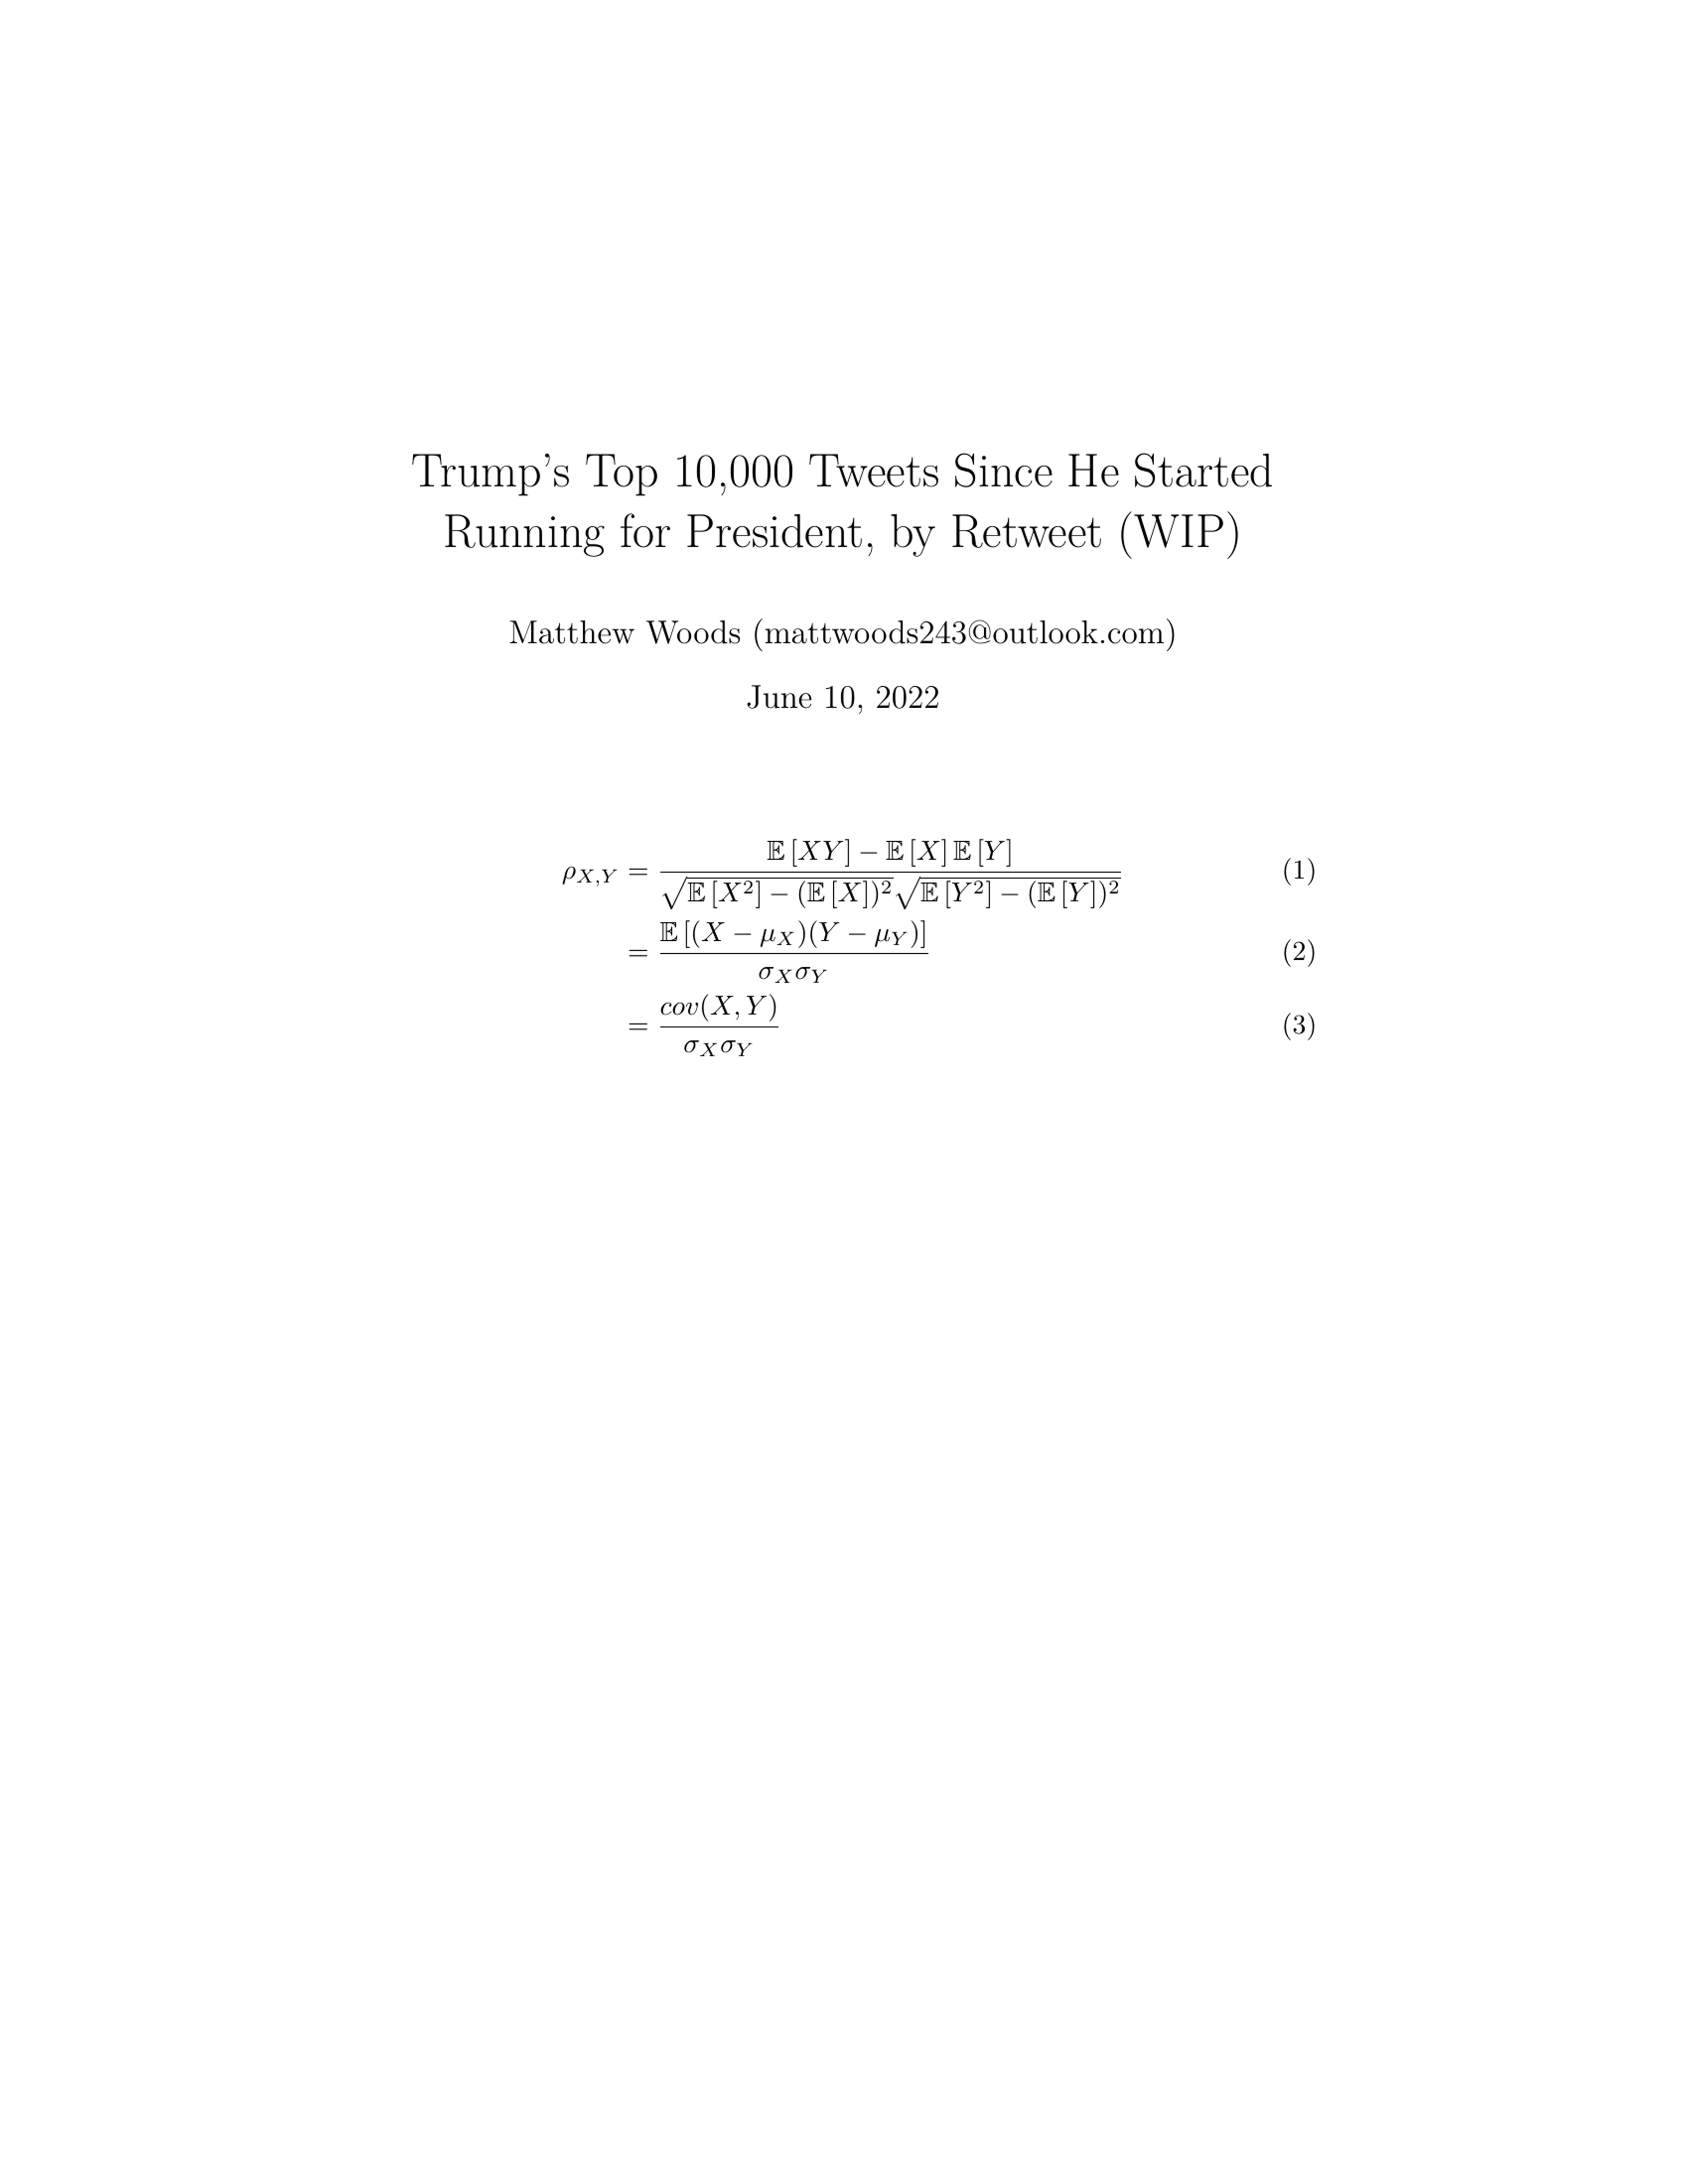

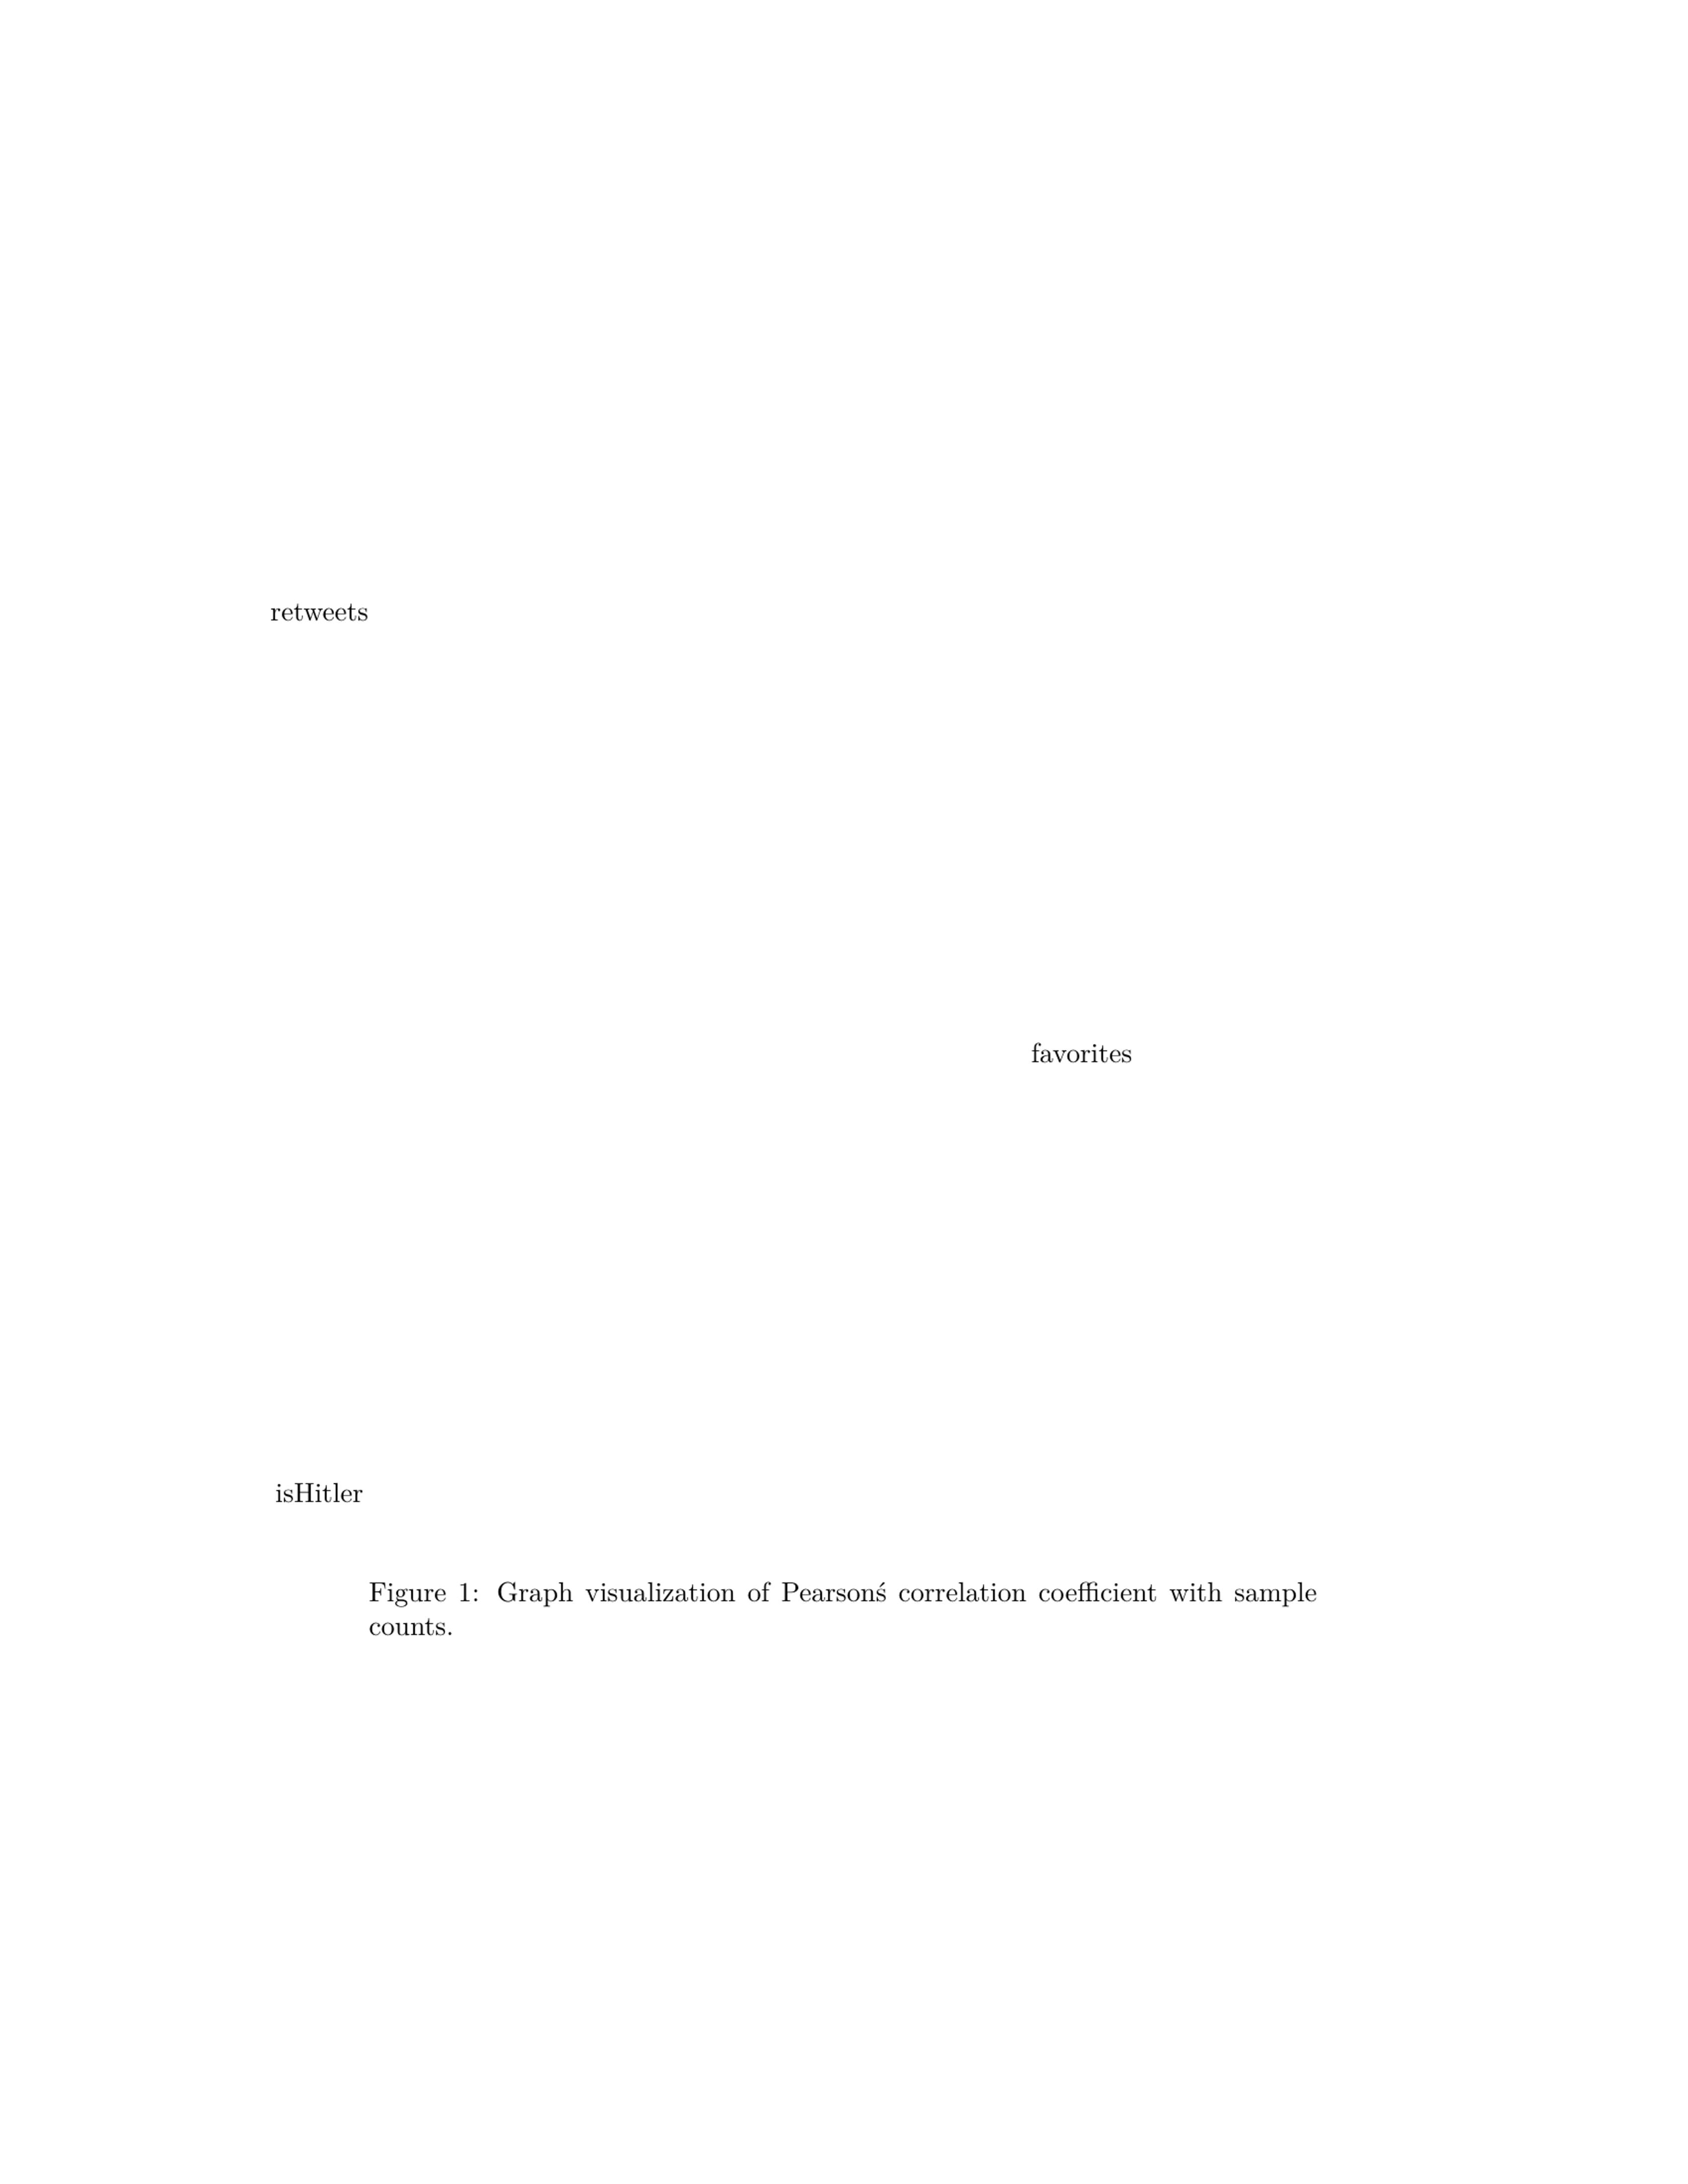

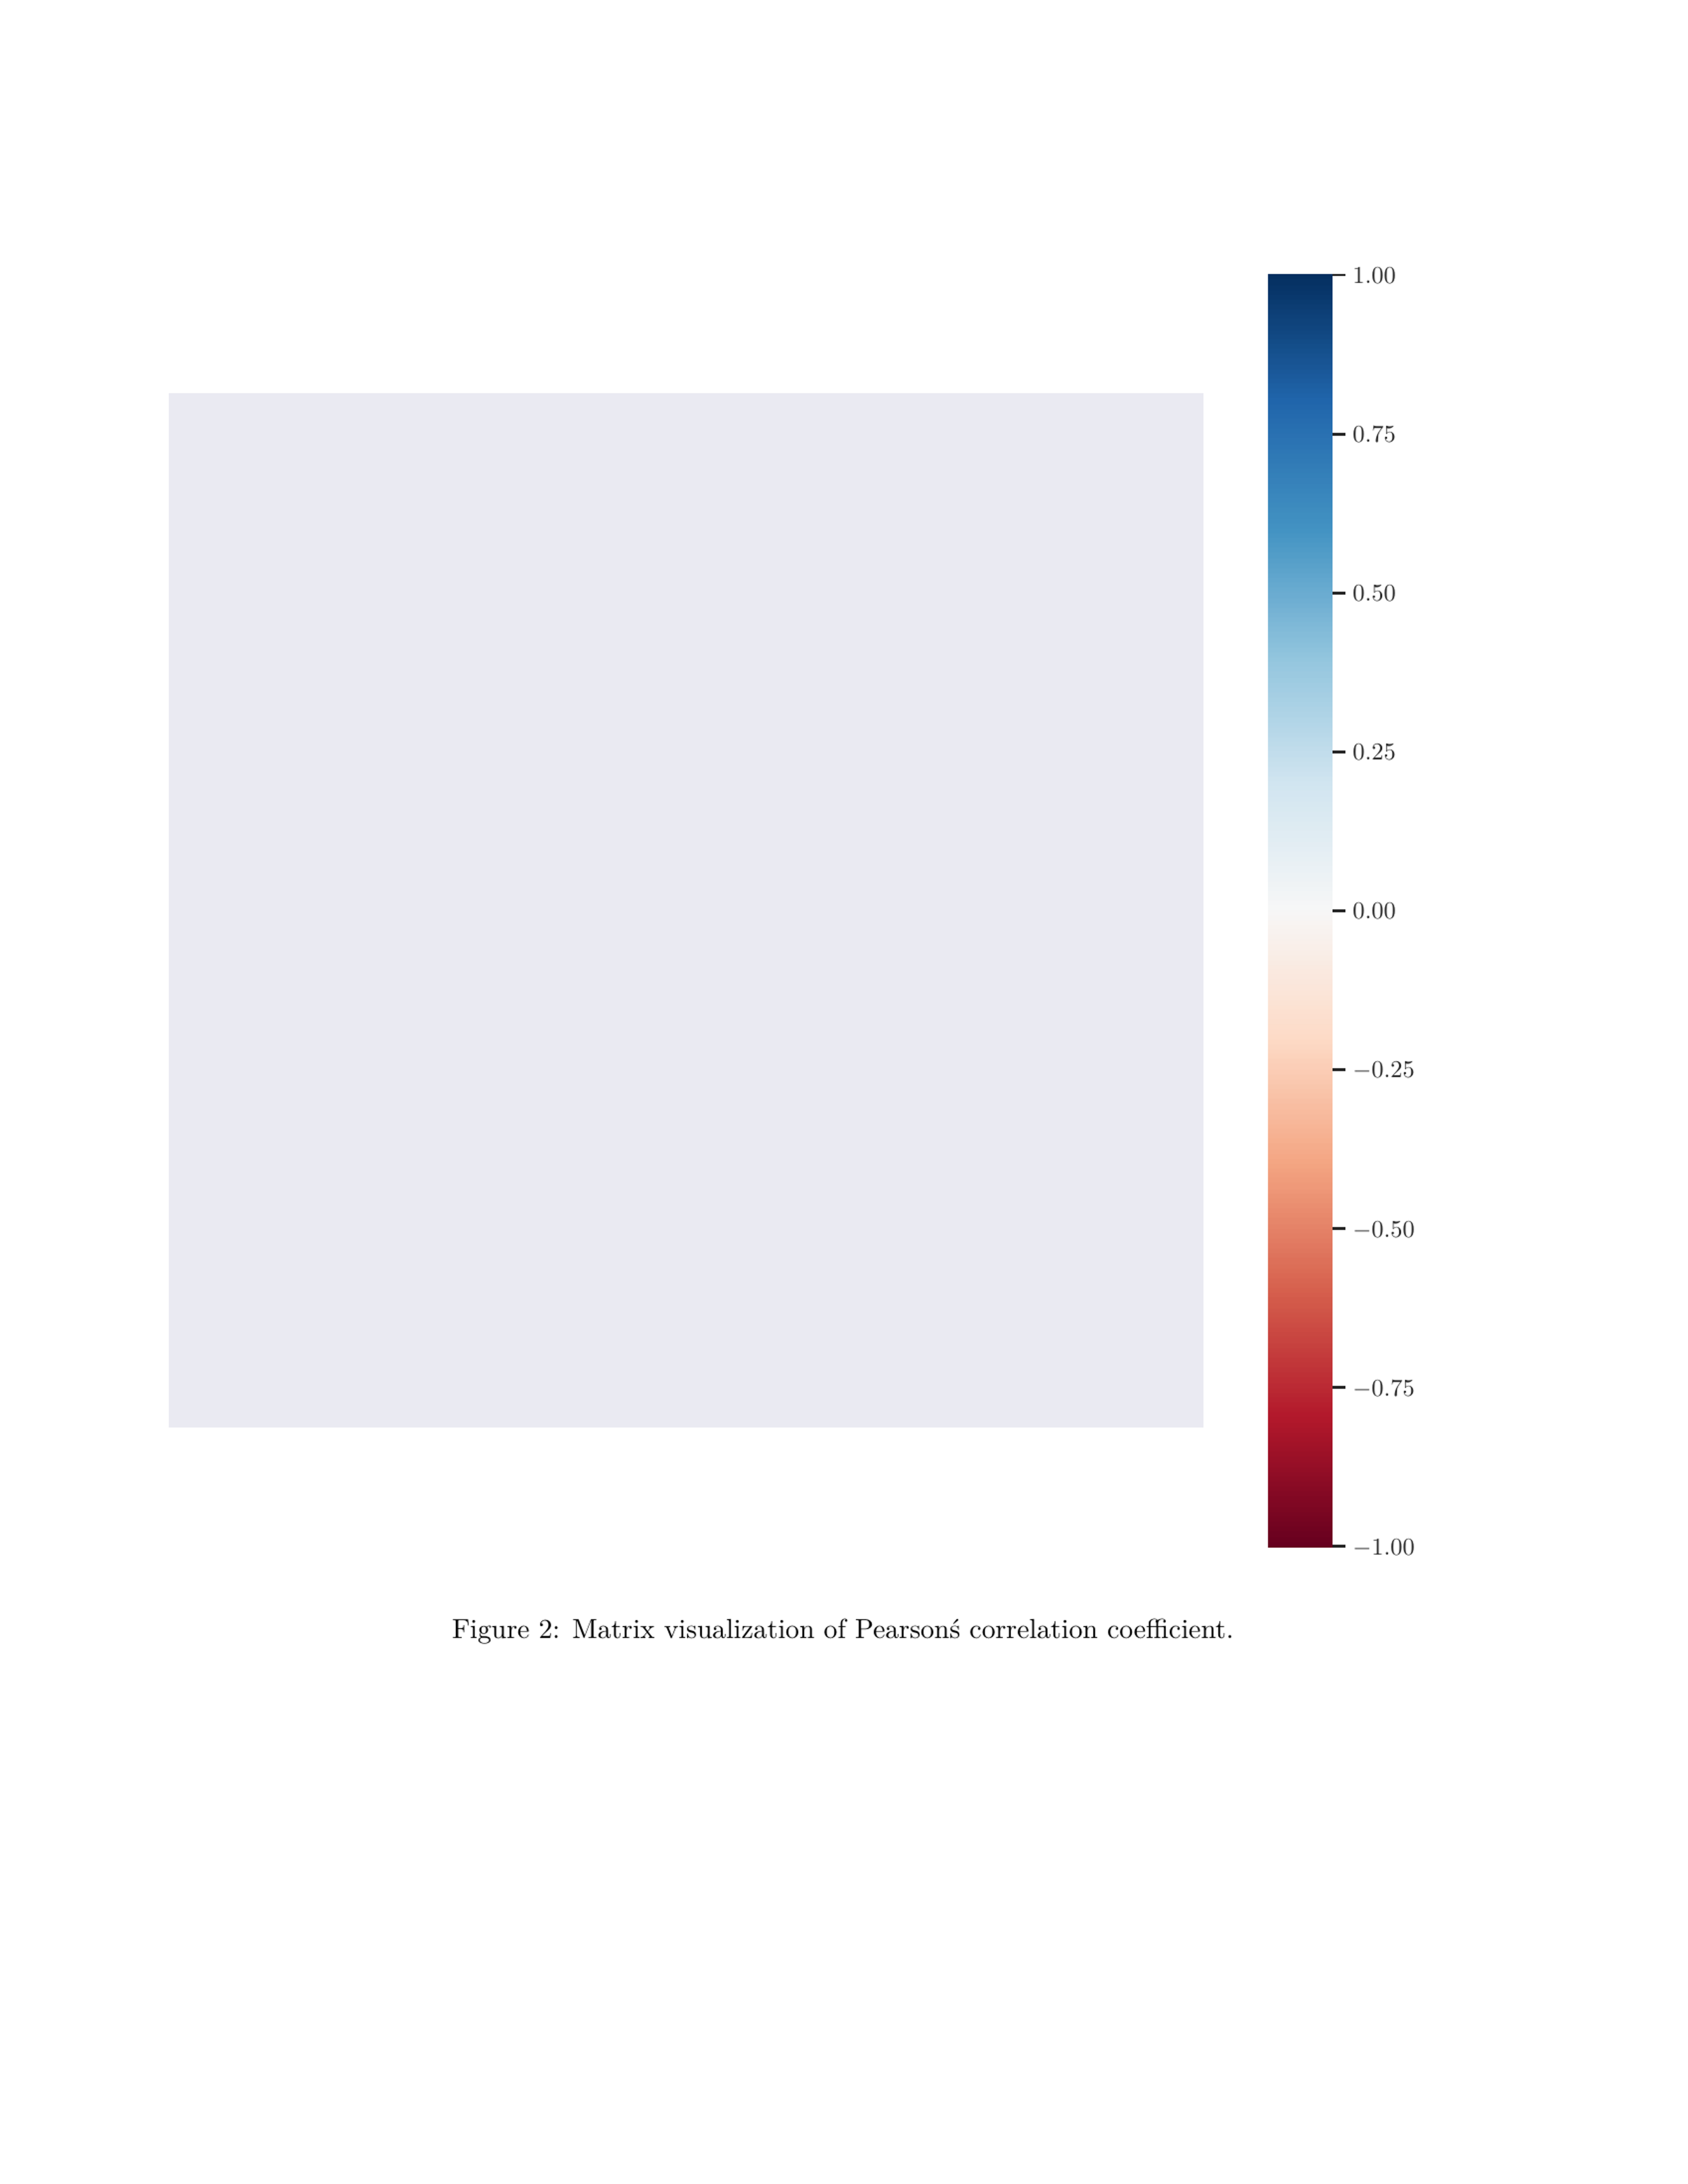

In [89]:
# LaTeX builder for correlation matrix/graph. 
import shutil
import glob

try:
    os.remove('tex/main.pdf')
except:
    pass

# Compute stats and flag correlations @ p < .05
NUM_SAMPLES = 10000
SIGNIFICANCE = .95

samples = np.zeros((NUM_SAMPLES, len(label_df.columns.values)**2))
for i in range(NUM_SAMPLES):                   
    samples[i, :] = label_df.sample(n=len(label_df), replace=True).corr(min_periods=0).fillna(0).values.flatten()

# Compute significance of corr matrix
positive_sig = np.percentile(samples, 100*(1 - SIGNIFICANCE)/2, axis=0) > 0
negative_sig = np.percentile(samples, 100*(1 - (1 - SIGNIFICANCE)/2), axis=0) < 0
corr_matrix_significance = np.reshape(np.logical_or(positive_sig, negative_sig), (len(label_df.columns.values), len(label_df.columns.values)))

# Layout radial
features = label_df.columns.values
feature_range = np.array(range(0, len(features)))
layout_rad = np.arange(0.0, 2*np.pi, 2*np.pi/len(label_df.columns.values))
xshift = np.cos(layout_rad)*6.5
yshift = np.sin(layout_rad)*6.5

# Compute final correlation Matrix
corr_matrix = corr_matrix_significance.astype(float)*np.reshape(samples.mean(axis=0), (len(features), len(features)))
drop_idx = np.diag(corr_matrix) == 0.0
keep_idx = feature_range[np.invert(np.isin(feature_range, feature_range[drop_idx]))]
drop_matrix = corr_matrix[keep_idx, :][:, keep_idx]
drop_col = features[drop_idx]
keep_col = features[keep_idx]

# Add space
space_list = ['isAntifa', 'isIKnowYouAreButWhatAmI', 'isLügenpresse']
for i, feature in enumerate(features):
    if feature in space_list:
        xshift[i] = np.cos(layout_rad[i])*7.0
        yshift[i] = np.sin(layout_rad[i])*7.0

# Plot figure
plt.figure(figsize=(8.5, 8.5))
plt.rc('text', usetex=True)
corr_heatmap = heatmap(
    drop_matrix, 
    vmin=-1.0, 
    vmax=1.0, 
    center=0.0,
    square=True,
    cmap = 'RdBu',
    xticklabels=keep_col, 
    yticklabels=keep_col
)
plt.rc('axes', unicode_minus=False)
plt.savefig('tex/corr_heatmap.pdf')
plt.gcf().set_visible(False)

# Graph view
# ticks = [x.replace('ß', '\\ss ').replace('ü', '{\\"u}') for x in label_df.columns.values]
graph = '\\begin{tikzpicture}\n'
for x, y, feature in zip(xshift, yshift, features):
    graph += '\\node[const] ({feature}) [xshift={x:.15f}cm, yshift={y:.15f}cm, minimum size=1.5cm] {{{feature}}}; '.format(x=x, y=y, feature=feature)

for i in range(corr_matrix.shape[0]):
    for j in range(i):
        if corr_matrix_significance[i, j]:
            corr = corr_matrix[i, j]
            
            if corr < 0:
                color = 'red!{corr}!white'.format(corr=corr*-100)
            else:
                color = 'blue!{corr}!white'.format(corr=corr*100)

            graph += '\\edge [-, color={color}, line width={thickness:.15f}pt] {{{feature1}}} {{{feature2}}}; '.format(color=color, feature1=label_df.columns.values[i], feature2=label_df.columns.values[j], thickness=np.abs(corr)*2)
        
with open ('tex/correlation_graph.tex', 'w', encoding='utf-8') as f:
    f.write(graph + '\n\\end{tikzpicture}')

# Compile latex
os.system('cd tex && xelatex main.tex')

images = convert_from_path('tex/main.pdf')
for i in range(len(images)):
    width, height = images[i].size
    display(images[i].resize((2*width, 2*height)))
    images[i].save('tex/main_' + str(i) + '.jpg')

In [90]:
# TODO: PGM fully connected graph to illustrate the complexity of
# probabilistic models, e.g. Latent Dirichlet Allocation.

In [ ]:
# TODO: Animation to the tune of 30fps LaTeX adding data points one per frame. We have 496 tweets to date which yeilds 16.5s of video. 
# Condiser music as well; do it, do it now.

In [ ]:
# TODO: Assert statements for data integrity with more_features.json.